# Task 5:


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load the CSV file (replace with your actual file path)
df = pd.read_csv("data_reduced.csv")

# View the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Summary info
print(df.info())

        ID  Severity        Start_Time          End_Time  Start_Lat  \
0  A-31600         2  30/11/2016 16:32  30/11/2016 22:32  40.225100   
1  A-31712         2  30/11/2016 23:36  01/12/2016 05:39  40.037300   
2  A-31716         4  01/12/2016 00:11  01/12/2016 06:13  40.064129   
3  A-31717         2  01/12/2016 00:47  01/12/2016 06:53  40.037300   
4  A-32166         2  02/12/2016 06:26  02/12/2016 12:26  40.026630   

   Start_Lng    End_Lat    End_Lng  Distance(mi)  \
0 -75.233880  40.225330 -75.234030         0.018   
1 -75.247070  40.066840 -75.311030         3.951   
2 -75.322466  40.026008 -75.230516         5.531   
3 -75.247070  40.066840 -75.311030         3.951   
4 -75.231520  40.024300 -75.226760         0.299   

                                         Description  ...  Roundabout Station  \
0                            At Stump Rd - Accident.  ...       False   False   
1  Between Belmont Ave/Exit 338 and Matsonford Rd...  ...       False   False   
2  Closed between

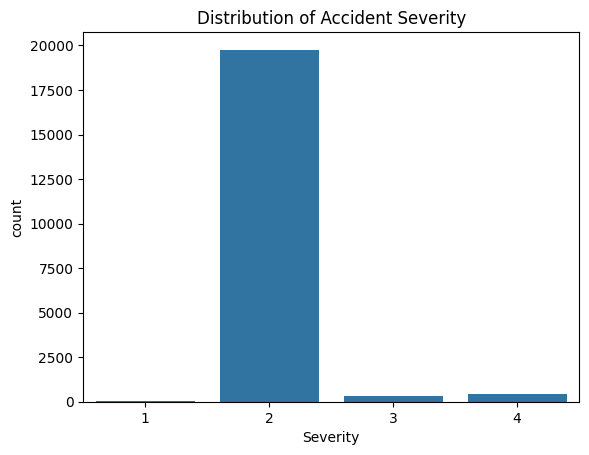

In [4]:
sns.countplot(x='Severity', data=df)
plt.title('Distribution of Accident Severity')
plt.show()

C:\Users\jay mahadev\AppData\Local\Temp\ipykernel_64752\2525464763.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')


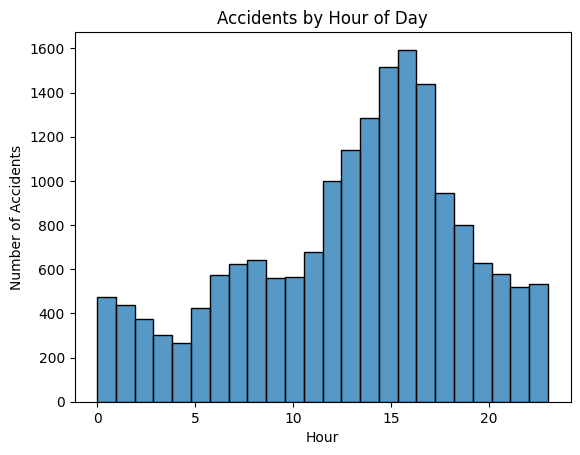

In [5]:
# Convert to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Extract hour
df['Hour'] = df['Start_Time'].dt.hour

sns.histplot(df['Hour'], bins=24, kde=False)
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.show()

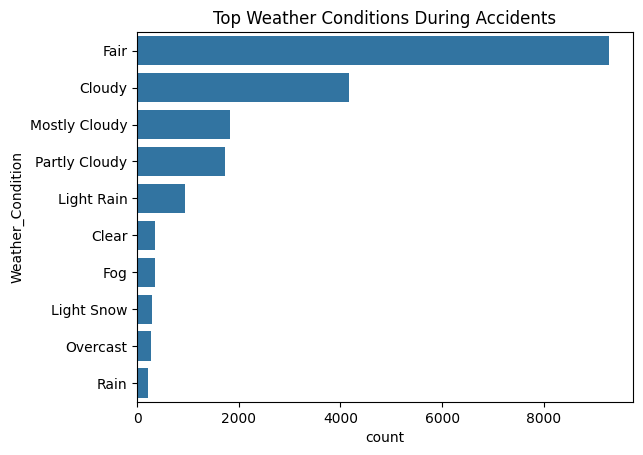

In [6]:
top_weather = df['Weather_Condition'].value_counts().nlargest(10).index
sns.countplot(data=df[df['Weather_Condition'].isin(top_weather)], 
              y='Weather_Condition', order=top_weather)
plt.title('Top Weather Conditions During Accidents')
plt.show()

In [7]:
import folium

# Filter a small sample for performance
sample_df = df[['Start_Lat', 'Start_Lng']].dropna().sample(1000)

# Create map
m = folium.Map(location=[sample_df['Start_Lat'].mean(), sample_df['Start_Lng'].mean()], zoom_start=10)

# Add markers
for _, row in sample_df.iterrows():
    folium.CircleMarker(location=[row['Start_Lat'], row['Start_Lng']], radius=2, color='red').add_to(m)

m